In [1]:
import pandas as pd
import tripy
from plotnine import ggplot, aes, geom_polygon, geom_segment, geom_point

/Users/sambolgert/.virtualenvs/canary/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def make_frame_from_polygon(polygon):
    x = [i[0] for i in polygon]
    y = [i[1] for i in polygon]
    df = pd.DataFrame({'x': x, 'y': y})
    return df
    
def make_frame_from_triangles(triangles):
    x_start = []
    x_end = []
    y_start = []
    y_end = []
    for triangle in triangles:
        for i, pt in enumerate(triangle):
            next_index = (i + 1) % 3
            x_start.append(pt[0])
            x_end.append(triangle[next_index][0])
            y_start.append(pt[1])
            y_end.append(triangle[next_index][1])
    df = pd.DataFrame({'x': x_start, 'y': y_start, 'xend': x_end, 'yend': y_end})
    return df
    

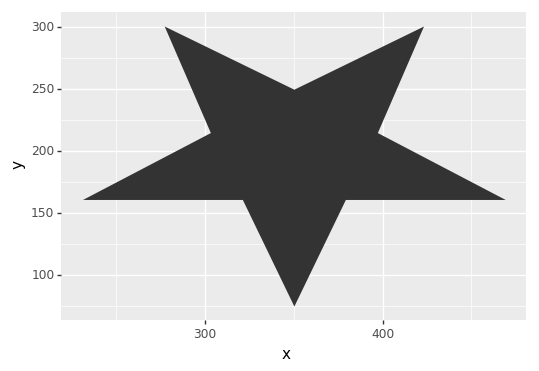

<ggplot: (288040801)>

In [3]:
STAR = [(350, 75), (379, 161), (469, 161), (397, 215), (423, 301), (350, 250), (277, 301), (303, 215), (231, 161), (321, 161)]
df = make_frame_from_polygon(STAR)
(ggplot(df, aes(x='x', y='y')) + geom_polygon())


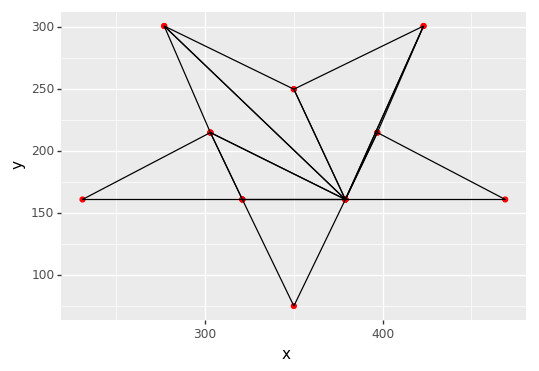

<ggplot: (288049565)>

In [4]:
triangles = tripy.earclip(STAR)
df = make_frame_from_triangles(triangles)
(ggplot(df, aes(x='x', y='y')) + geom_point(color='red') + geom_segment(aes(x='x', y='y', xend='xend', yend='yend')))


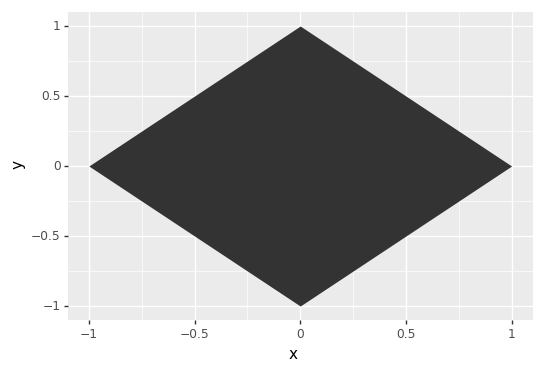

<ggplot: (288204117)>

In [5]:
SIMPLE_DIAMOND = [(0,1), (-1, 0), (0, -1), (1, 0)]
df = make_frame_from_polygon(SIMPLE_DIAMOND)
(ggplot(df, aes(x='x', y='y')) + geom_polygon())


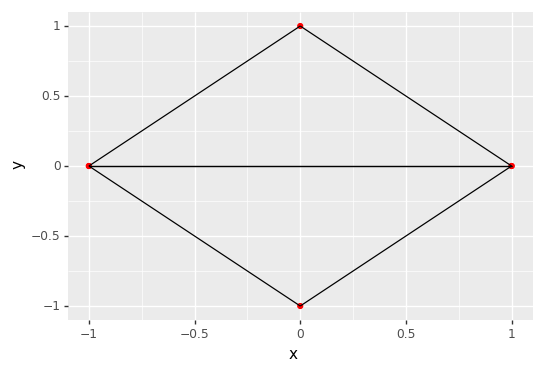

<ggplot: (288210545)>

In [6]:
triangles = tripy.earclip(SIMPLE_DIAMOND)
df = make_frame_from_triangles(triangles)
(ggplot(df, aes(x='x', y='y')) + geom_point(color='red') + geom_segment(aes(x='x', y='y', xend='xend', yend='yend')))

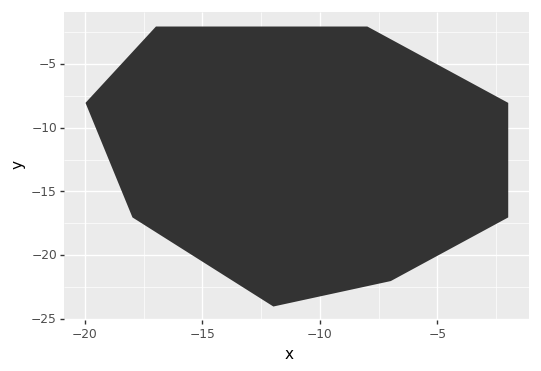

<ggplot: (288257777)>

In [7]:
NO_CONVEX_VERTEX = [(-2.0, -17.0), (-2.0, -8.0), (-8.0, -2.0), (-17.0, -2.0), (-20.0, -8.0), (-18.0, -17.0), (-12.0, -24.0), (-7.0, -22.0)]
df = make_frame_from_polygon(NO_CONVEX_VERTEX)
(ggplot(df, aes(x='x', y='y')) + geom_polygon())

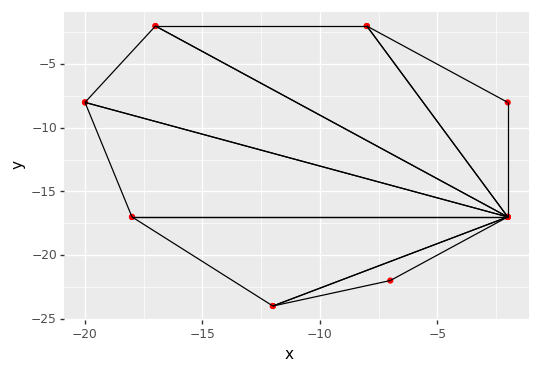

<ggplot: (288411093)>

In [8]:
triangles = tripy.earclip(NO_CONVEX_VERTEX)
df = make_frame_from_triangles(triangles)
(ggplot(df, aes(x='x', y='y')) + geom_point(color='red') + geom_segment(aes(x='x', y='y', xend='xend', yend='yend')))